<a href="https://colab.research.google.com/github/Sivagadiraju/Home_assignment1/blob/main/Loss%20Functions%20%26%20Hyperparameter%20Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1.	Tensor Manipulations & Reshaping

import tensorflow as tf

# 1. Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6))
print("Original Tensor:\n", tensor.numpy())

# 2. Find its rank and shape
rank = tf.rank(tensor)
shape = tf.shape(tensor)
print("\nRank of tensor:", rank.numpy())
print("Shape of tensor:", shape.numpy())

# 3. Reshape it into (2, 3, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print("\nReshaped Tensor Shape:", reshaped_tensor.shape)

# Transpose it to (3, 2, 4)
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print("Transposed Tensor Shape:", transposed_tensor.shape)

# 4. Broadcast a smaller tensor (1, 4) to match the larger tensor
small_tensor = tf.random.uniform(shape=(1, 4))
broadcasted_tensor = tf.broadcast_to(small_tensor, shape=(4, 4))

# Add the tensors
added_tensor = tensor[:, :4] + broadcasted_tensor
print("\nBroadcasted Small Tensor:\n", broadcasted_tensor.numpy())
print("Result after Broadcasting and Addition:\n", added_tensor.numpy())


Original Tensor:
 [[0.9294814  0.90773785 0.38509893 0.68397677 0.6850853  0.6777698 ]
 [0.8606199  0.7315279  0.921088   0.57737756 0.10160732 0.83202386]
 [0.6381999  0.78020453 0.4484346  0.01192021 0.9249551  0.3793006 ]
 [0.40398383 0.6059836  0.15265667 0.92765296 0.6172048  0.42187464]]

Rank of tensor: 2
Shape of tensor: [4 6]

Reshaped Tensor Shape: (2, 3, 4)
Transposed Tensor Shape: (3, 2, 4)

Broadcasted Small Tensor:
 [[0.91338944 0.98341453 0.47797954 0.9300313 ]
 [0.91338944 0.98341453 0.47797954 0.9300313 ]
 [0.91338944 0.98341453 0.47797954 0.9300313 ]
 [0.91338944 0.98341453 0.47797954 0.9300313 ]]
Result after Broadcasting and Addition:
 [[1.8428708  1.8911524  0.8630785  1.6140081 ]
 [1.7740093  1.7149425  1.3990675  1.5074089 ]
 [1.5515894  1.7636191  0.92641413 0.9419515 ]
 [1.3173733  1.5893981  0.6306362  1.8576843 ]]


Loss for y_pred_1:
MSE Loss: 0.02
Categorical Cross-Entropy Loss: 0.22314353

Loss for y_pred_2:
MSE Loss: 0.08
Categorical Cross-Entropy Loss: 0.5108256


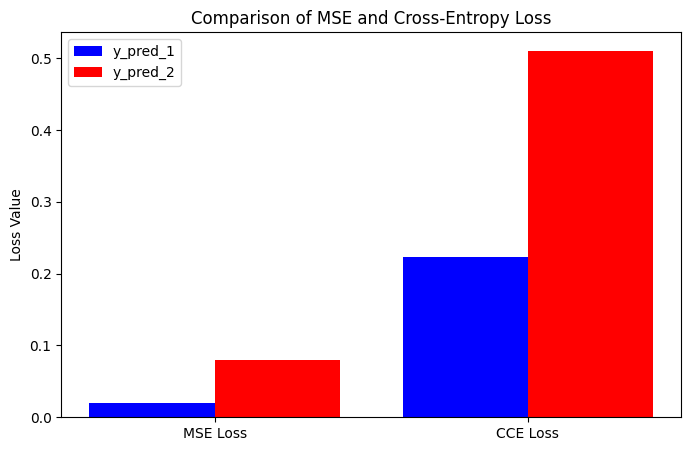

In [2]:
#2.	Loss Functions & Hyperparameter Tuning


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Define true values (y_true) and model predictions (y_pred)
y_true = np.array([0, 1, 0])  # One-hot encoded true label
y_pred_1 = np.array([0.1, 0.8, 0.1])  # Initial prediction
y_pred_2 = np.array([0.2, 0.6, 0.2])  # Slightly modified prediction

# 2. Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses
mse = tf.keras.losses.MeanSquaredError()
cce = tf.keras.losses.CategoricalCrossentropy()

loss_mse_1 = mse(y_true, y_pred_1).numpy()
loss_cce_1 = cce(y_true, y_pred_1).numpy()

loss_mse_2 = mse(y_true, y_pred_2).numpy()
loss_cce_2 = cce(y_true, y_pred_2).numpy()

# Print loss values
print("Loss for y_pred_1:")
print("MSE Loss:", loss_mse_1)
print("Categorical Cross-Entropy Loss:", loss_cce_1)

print("\nLoss for y_pred_2:")
print("MSE Loss:", loss_mse_2)
print("Categorical Cross-Entropy Loss:", loss_cce_2)

# 3. Plot loss function values using Matplotlib
labels = ["MSE Loss", "CCE Loss"]
loss_values_1 = [loss_mse_1, loss_cce_1]
loss_values_2 = [loss_mse_2, loss_cce_2]

x = np.arange(len(labels))  # Label positions

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, loss_values_1, width=0.4, label="y_pred_1", color="blue")
plt.bar(x + 0.2, loss_values_2, width=0.4, label="y_pred_2", color="red")

plt.xticks(x, labels)
plt.ylabel("Loss Value")
plt.title("Comparison of MSE and Cross-Entropy Loss")
plt.legend()
plt.show()
